In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df=pd.read_csv("C:/Users/91930/Downloads/Sample_HR.csv")
#df=df[df.duplicated()].shape[0]
df=df.drop_duplicates()
#print('duplicated removed are',df)
df=df.drop_duplicates()

#Calculating null values age and filling it with average of age 
Average_Age=df['Age'].mean()

# Average_Age=int(Average_Age)
df['Age']=df['Age'].fillna(Average_Age)

#Replacing null values of Department to Data Engineering
df['Department']=df['Department'].fillna('Data Engineering')

#Standardization of values(Gender)
gender_mapping = {'M': 'Male', 'F': 'Female'}
df['Gender'] = df['Gender'].replace(gender_mapping)

#Concatenating First name and Last name column
df['Full Name']=df['First Name']+ ' ' + df['Last Name']

#changing the position of Full Name column to 3
columns = df.columns.tolist()
last_name_index = columns.index('Last Name')
last_name_index
columns.insert(last_name_index + 1, columns.pop(columns.index('Full Name')))
df=df[columns]

#Adding a new column(YearsAtCompany)
hire_date=pd.to_datetime(df['Hire_Date']).dt.year
current_year=datetime.now().year
df['YearsAtCompany']= current_year-hire_date
df.head(1)








,Employee_ID,First Name,Last Name,Full Name,Gender,MaritalStatus,Department,Grade,Employee_Count,Job_Satisfaction,...,MonthlyRate,Age,Job Type,Job Experience,Hire_Date,Company_Environment,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,Country
0,1,Shelia,Mahoney,Shelia Mahoney,Male,Single,Sales,2,1,4,...,19479,41.0,Permannent,16,1/1/2010,5,0,1,14,United Kingdom


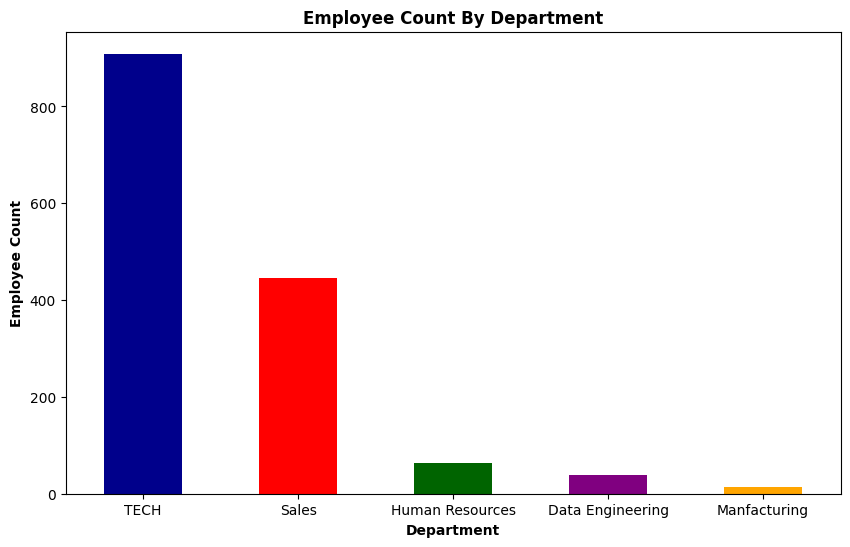

In [13]:
#Creation of Bar Chart
department_count=df['Department'].value_counts()
plt.figure(figsize=(10,6))
color=['darkblue','red','darkgreen','purple','orange']
department_count.plot(kind='bar',color=color)
plt.title('Employee Count By Department',fontweight='bold')
plt.xlabel('Department',fontweight='bold')
plt.ylabel('Employee Count',fontweight='bold')
plt.xticks(rotation=0)
plt.show()

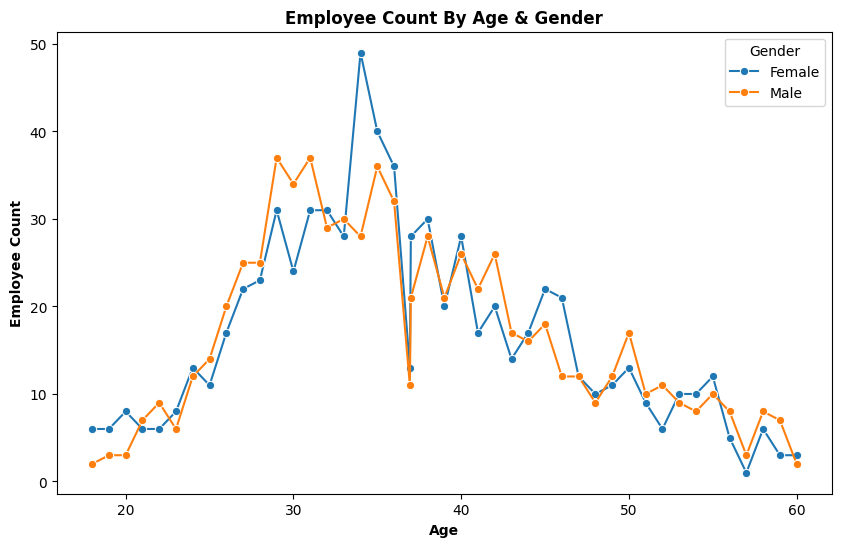

In [18]:
#creating line chart 
age_gender=df.groupby(['Age','Gender']).size().reset_index(name='Count')
age_gender
plt.figure(figsize=(10,6))
sns.lineplot(data=age_gender, x='Age', y='Count', hue='Gender', marker='o')
plt.title('Employee Count By Age & Gender', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Employee Count', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

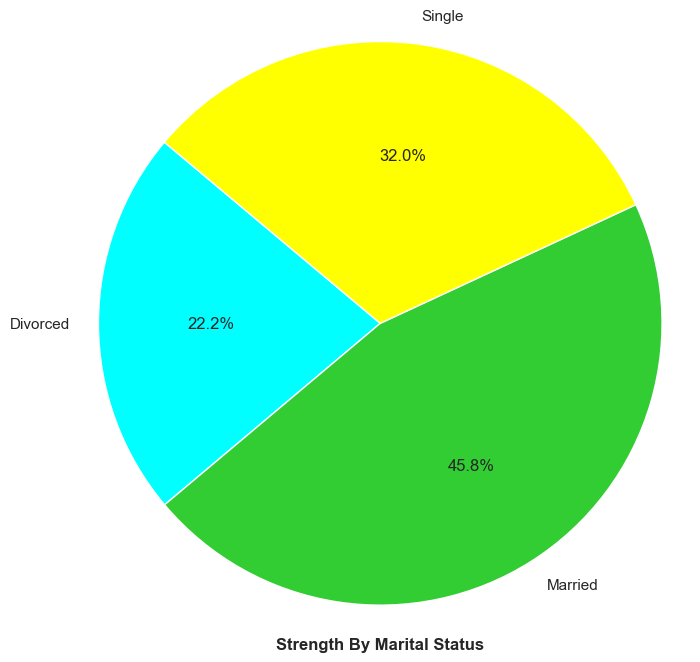

In [35]:
#Creation of pie chart for martial status
Marital_Status_count=df.groupby(['MaritalStatus']).size().reset_index(name='Count')
Marital_Status=Marital_Status_count['MaritalStatus']
Count=Marital_Status_count['Count']

sns.set(style='whitegrid')
colors = sns.color_palette('colorblind')[0:len(Marital_Status)]
colors=['cyan','limegreen','yellow']
plt.figure(figsize=(8,8))
plt.pie(Count, labels=Marital_Status, colors=colors, autopct='%1.1f%%', startangle=140 )
plt.axis('equal') #for ensuring that pie as a circle
plt.xlabel('Strength By Marital Status', fontweight='bold')
plt.show()

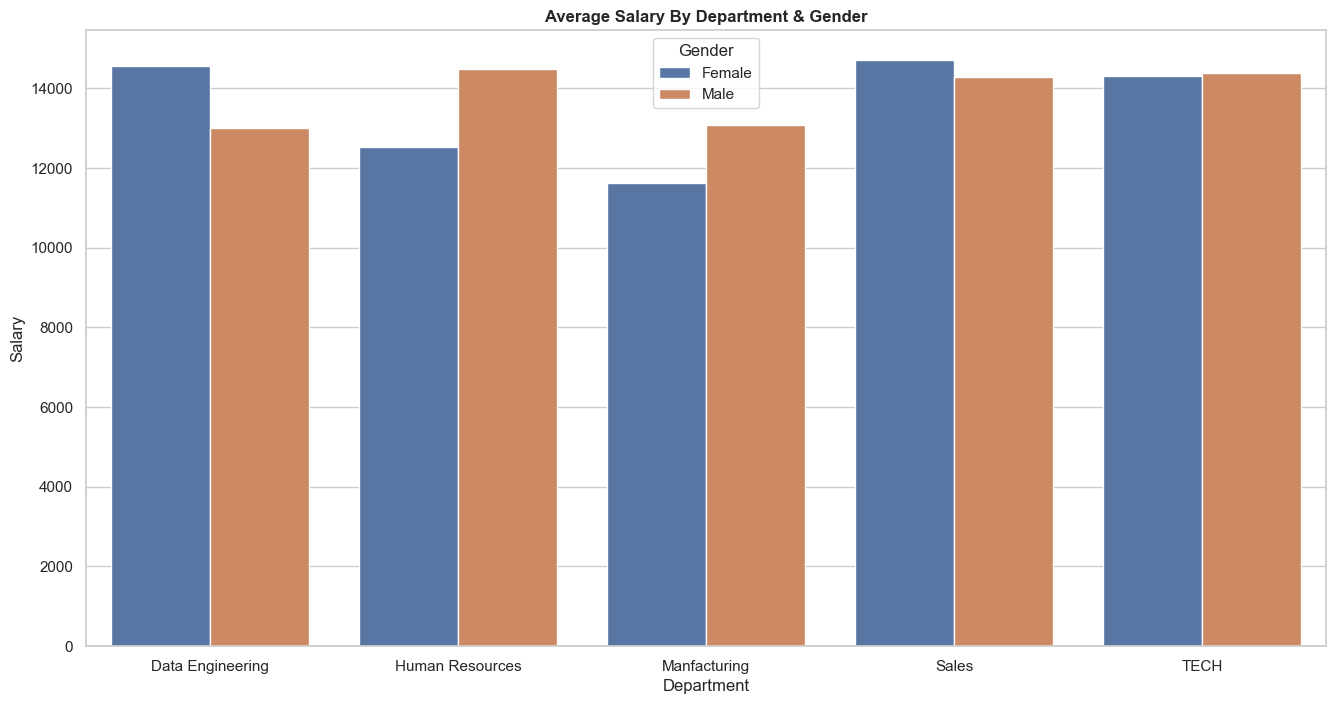

In [48]:
#creation of barchart for average salary by department and by gender
df=df.rename(columns={'MonthlyRate':'Salary'})
average_Salary=df.groupby(['Department','Gender'])['Salary'].mean().reset_index()
plt.figure(figsize=(16,8))
sns.barplot(data=average_Salary, x='Department', y='Salary', hue='Gender')
plt.title('Average Salary By Department & Gender', fontweight='bold')
plt.show()

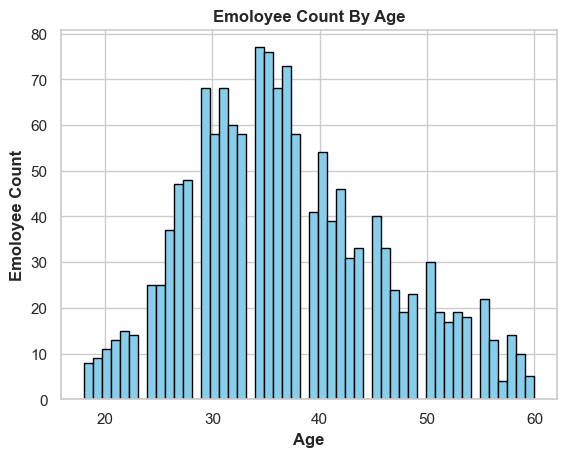

In [51]:
#creation of histogram
age=df['Age']
plt.hist(age, bins=50, edgecolor='black',color='skyblue')
plt.title('Emoloyee Count By Age',fontweight='bold')
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Emoloyee Count',fontweight='bold')
plt.show()

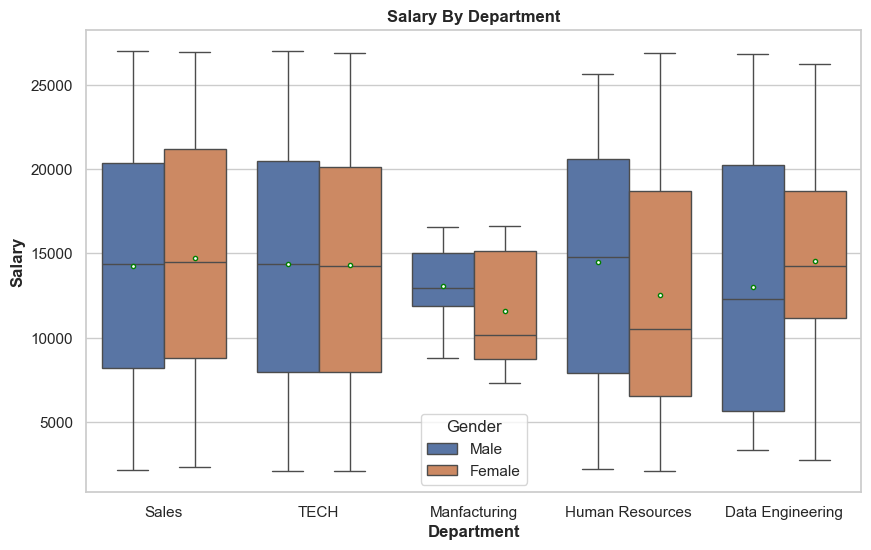

In [53]:
#creation of boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Salary', data=df,hue='Gender',showmeans='True',
meanprops={"marker":"o" ,"markerfacecolor":"white","markersize":"3","markeredgecolor":"green"})                                                                                  
plt.title('Salary By Department',fontweight='bold')
plt.xlabel('Department',fontweight='bold')
plt.ylabel('Salary',fontweight='bold')
plt.show()